In [1]:
# Dependencies
import pandas as pd
import numpy as np
import datetime as dt
import dataframe_image as dfi

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [3]:
# classes that automap found
Base.classes.keys()

['measurement', 'station']

In [4]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [5]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [6]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

In [7]:
columns = Measurement.__table__.columns
print(columns)

ImmutableColumnCollection(measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs)


In [8]:
columns = Station.__table__.columns
print(columns)

ImmutableColumnCollection(station.id, station.station, station.name, station.latitude, station.longitude, station.elevation)


In [9]:
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_tobs = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6)

In [10]:
#  3. Convert the June temperatures to a list.
june_tobs = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==6).all()
june_tobs

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [11]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_tobs_df = pd.DataFrame(june_tobs, columns=['date','Jun Temps'])
dfi.export(june_tobs_df.head(10), 'june_tobs_df.png')
june_tobs_df

,date,Jun Temps
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [12]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_tobs_df.describe()

,Jun Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


In [13]:
data_june = session.query(Measurement.date, Measurement.tobs, Measurement.prcp, Measurement.station).\
            filter(extract('month', Measurement.date) == 6).all()
data_june

[('2010-06-01', 78.0, 0.0, 'USC00519397'),
 ('2010-06-02', 76.0, 0.01, 'USC00519397'),
 ('2010-06-03', 78.0, 0.0, 'USC00519397'),
 ('2010-06-04', 76.0, 0.0, 'USC00519397'),
 ('2010-06-05', 77.0, 0.0, 'USC00519397'),
 ('2010-06-06', 78.0, 0.0, 'USC00519397'),
 ('2010-06-07', 77.0, 0.0, 'USC00519397'),
 ('2010-06-08', 78.0, 0.0, 'USC00519397'),
 ('2010-06-09', 78.0, 0.0, 'USC00519397'),
 ('2010-06-10', 79.0, 0.0, 'USC00519397'),
 ('2010-06-11', 78.0, 0.0, 'USC00519397'),
 ('2010-06-12', 78.0, 0.0, 'USC00519397'),
 ('2010-06-13', 78.0, 0.0, 'USC00519397'),
 ('2010-06-14', 77.0, 0.0, 'USC00519397'),
 ('2010-06-15', 78.0, 0.0, 'USC00519397'),
 ('2010-06-16', 78.0, 0.0, 'USC00519397'),
 ('2010-06-17', 77.0, 0.0, 'USC00519397'),
 ('2010-06-18', 77.0, 0.0, 'USC00519397'),
 ('2010-06-19', 82.0, 0.0, 'USC00519397'),
 ('2010-06-20', 78.0, 0.0, 'USC00519397'),
 ('2010-06-21', 78.0, 0.0, 'USC00519397'),
 ('2010-06-22', 78.0, 0.0, 'USC00519397'),
 ('2010-06-23', 78.0, 0.0, 'USC00519397'),
 ('2010-06

In [14]:
data_june_df = pd.DataFrame(data_june, columns=['date','Jun Temps','Jun Prec','Station'])
dfi.export(data_june_df.head(10), 'data_june_df.png')
data_june_df

,date,Jun Temps,Jun Prec,Station
0,2010-06-01,78.0,0.00,USC00519397
1,2010-06-02,76.0,0.01,USC00519397
2,2010-06-03,78.0,0.00,USC00519397
3,2010-06-04,76.0,0.00,USC00519397
4,2010-06-05,77.0,0.00,USC00519397
...,...,...,...,...
1695,2017-06-26,79.0,0.02,USC00516128
1696,2017-06-27,74.0,0.10,USC00516128
1697,2017-06-28,74.0,0.02,USC00516128
1698,2017-06-29,76.0,0.04,USC00516128


In [15]:
data_june_df.describe()

,Jun Temps,Jun Prec
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


In [16]:
june_station = session.query(Measurement.station, func.avg(Measurement.tobs)).\
                filter(extract('month', Measurement.date) == 6).\
                group_by(Measurement.station).all()
june_station

[('USC00511918', 74.13939393939394),
 ('USC00513117', 74.05084745762711),
 ('USC00514830', 76.00537634408602),
 ('USC00516128', 71.9372197309417),
 ('USC00517948', 76.6554054054054),
 ('USC00518838', 73.39473684210526),
 ('USC00519281', 73.27118644067797),
 ('USC00519397', 77.55932203389831),
 ('USC00519523', 76.66810344827586)]

In [17]:
june_station_df = pd.DataFrame(june_station, columns=['Station', ' Jun Temps Avg'])
dfi.export(june_station_df, 'june_station_df.png')
june_station_df

,Station,Jun Temps Avg
0,USC00511918,74.139394
1,USC00513117,74.050847
2,USC00514830,76.005376
3,USC00516128,71.937220
4,USC00517948,76.655405
5,USC00518838,73.394737
6,USC00519281,73.271186
7,USC00519397,77.559322
8,USC00519523,76.668103


## D2: Determine the Summary Statistics for December

In [18]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
december_tobs = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12)

In [19]:
# 7. Convert the December temperatures to a list.
december_tobs = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date)==12).all()
december_tobs

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [20]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_tobs_df = pd.DataFrame(december_tobs, columns=['date','Dec Temps'])
dfi.export(december_tobs_df.head(10), 'december_tobs_df.png')
december_tobs_df

,date,Dec Temps
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [21]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_tobs_df.describe()

,Dec Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [22]:
data_december = session.query(Measurement.date, Measurement.tobs, Measurement.prcp, Measurement.station).\
                filter(extract('month', Measurement.date) == 12).all()
data_december

[('2010-12-01', 76.0, 0.04, 'USC00519397'),
 ('2010-12-03', 74.0, 0.0, 'USC00519397'),
 ('2010-12-04', 74.0, 0.0, 'USC00519397'),
 ('2010-12-06', 64.0, 0.0, 'USC00519397'),
 ('2010-12-07', 64.0, 0.0, 'USC00519397'),
 ('2010-12-08', 67.0, 0.0, 'USC00519397'),
 ('2010-12-09', 77.0, 0.0, 'USC00519397'),
 ('2010-12-10', 66.0, 1.58, 'USC00519397'),
 ('2010-12-11', 69.0, 0.77, 'USC00519397'),
 ('2010-12-12', 68.0, 0.0, 'USC00519397'),
 ('2010-12-13', 68.0, 0.0, 'USC00519397'),
 ('2010-12-14', 71.0, 0.0, 'USC00519397'),
 ('2010-12-15', 74.0, 0.0, 'USC00519397'),
 ('2010-12-16', 67.0, 0.0, 'USC00519397'),
 ('2010-12-17', 66.0, 0.0, 'USC00519397'),
 ('2010-12-18', 69.0, 0.0, 'USC00519397'),
 ('2010-12-19', 71.0, 1.4, 'USC00519397'),
 ('2010-12-23', 70.0, 0.0, 'USC00519397'),
 ('2010-12-24', 70.0, 0.0, 'USC00519397'),
 ('2010-12-26', 74.0, None, 'USC00519397'),
 ('2010-12-27', 74.0, 0.13, 'USC00519397'),
 ('2010-12-28', 71.0, 0.55, 'USC00519397'),
 ('2010-12-29', 75.0, 0.06, 'USC00519397'),
 ('2

In [23]:
data_december_df = pd.DataFrame(data_december, columns=['date','Dec Temps','Dec Prec','Station'])
dfi.export(data_december_df.head(10), 'data_december_df.png')
data_december_df

,date,Dec Temps,Dec Prec,Station
0,2010-12-01,76.0,0.04,USC00519397
1,2010-12-03,74.0,0.00,USC00519397
2,2010-12-04,74.0,0.00,USC00519397
3,2010-12-06,64.0,0.00,USC00519397
4,2010-12-07,64.0,0.00,USC00519397
...,...,...,...,...
1512,2016-12-27,71.0,0.14,USC00516128
1513,2016-12-28,71.0,0.14,USC00516128
1514,2016-12-29,69.0,1.03,USC00516128
1515,2016-12-30,65.0,2.37,USC00516128


In [24]:
data_december_df.describe()

,Dec Temps,Dec Prec
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


In [25]:
december_station = session.query(Measurement.station, func.avg(Measurement.tobs)).\
                filter(extract('month', Measurement.date) == 12).\
                group_by(Measurement.station).all()
december_station

[('USC00511918', 69.6842105263158),
 ('USC00513117', 71.06944444444444),
 ('USC00514830', 73.2247191011236),
 ('USC00516128', 69.29126213592232),
 ('USC00517948', 71.8348623853211),
 ('USC00518838', 72.42105263157895),
 ('USC00519281', 69.90322580645162),
 ('USC00519397', 71.10952380952381),
 ('USC00519523', 72.43333333333334)]

In [26]:
december_station_df = pd.DataFrame(december_station, columns=['Station', ' Dec Temps Avg'])
dfi.export(december_station_df, 'december_station_df.png')
december_station_df

,Station,Dec Temps Avg
0,USC00511918,69.684211
1,USC00513117,71.069444
2,USC00514830,73.224719
3,USC00516128,69.291262
4,USC00517948,71.834862
5,USC00518838,72.421053
6,USC00519281,69.903226
7,USC00519397,71.109524
8,USC00519523,72.433333


## Diferences between June and December

In [34]:
jun_tob_desc_df = june_tobs_df.describe()
dec_tob_desc_df = december_tobs_df.describe()
jun_dec_tob_df = jun_tob_desc_df.merge(dec_tob_desc_df, left_index = True, right_index = True)
dfi.export(jun_dec_tob_df, 'jun_dec_tob_df.png')
jun_dec_tob_df

,Jun Temps,Dec Temps
count,1700.000000,1517.000000
mean,74.944118,71.041529
std,3.257417,3.745920
min,64.000000,56.000000
25%,73.000000,69.000000
50%,75.000000,71.000000
75%,77.000000,74.000000
max,85.000000,83.000000


In [35]:
jun_dat_desc_df = data_june_df.describe()
dec_dat_desc_df = data_december_df.describe()
jun_dec_data_df = jun_dat_desc_df.merge(dec_dat_desc_df, left_index = True, right_index = True)
dfi.export(jun_dec_data_df, 'jun_dec_data_df.png')
jun_dec_data_df

,Jun Temps,Jun Prec,Dec Temps,Dec Prec
count,1700.000000,1574.000000,1517.000000,1405.000000
mean,74.944118,0.136360,71.041529,0.216819
std,3.257417,0.335731,3.745920,0.541399
min,64.000000,0.000000,56.000000,0.000000
25%,73.000000,0.000000,69.000000,0.000000
50%,75.000000,0.020000,71.000000,0.030000
75%,77.000000,0.120000,74.000000,0.150000
max,85.000000,4.430000,83.000000,6.420000


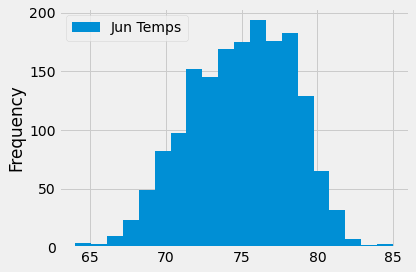

In [28]:
june_tobs_df.plot.hist(bins=20)
plt.tight_layout()
plt.savefig("june_tobs.png")

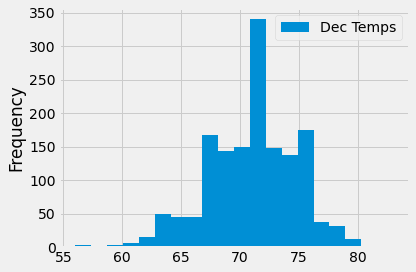

In [29]:
december_tobs_df.plot.hist(bins=20)
plt.tight_layout()
plt.savefig("december_tobs.png")

In [30]:
jun_dec_st_df = june_station_df.merge(december_station_df, on = 'Station')
dfi.export(jun_dec_st_df, 'jun_dec_st_df.png')
jun_dec_st_df

,Station,Jun Temps Avg,Dec Temps Avg
0,USC00511918,74.139394,69.684211
1,USC00513117,74.050847,71.069444
2,USC00514830,76.005376,73.224719
3,USC00516128,71.937220,69.291262
4,USC00517948,76.655405,71.834862
5,USC00518838,73.394737,72.421053
6,USC00519281,73.271186,69.903226
7,USC00519397,77.559322,71.109524
8,USC00519523,76.668103,72.433333
